# Naive Bayes

## Import and Settings

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import dask
import dask.dataframe as dd
import dask.array as da

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from joblib import dump

In [6]:
df = dd.read_csv('prepared_ds.csv')

## Initialise Sample Dataframe

In [8]:
df_fast = df.sample(frac=0.01, random_state = 1).compute()

In [7]:
df = df.compute()

## Train-Test-Split

In [8]:
train, test, train_lbl, test_lbl = train_test_split(df.loc[:, ~df.columns.isin(['Unnamed: 0', "Label"])], df["Label"], test_size=0.2, random_state=1)

## Training

In [9]:
gnb = GaussianNB()
gnb.fit(train, train_lbl)

GaussianNB()

## Evaluation

In [10]:
gnb.score(test, test_lbl)

0.7928270398701732

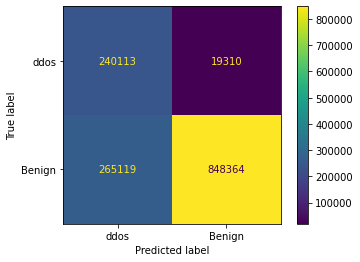

In [12]:
plot_confusion_matrix(gnb, test, test_lbl, labels=['ddos', 'Benign'])

## Save Model

In [13]:
dump(gnb, 'models/naive_bayes.model')

['models/naive_bayes.model']